In [1]:
import os
import shutil # for file operations
import zipfile, os, sys, random 
from glob import glob  # for search files
import pandas as pd # for data manipulation
import numpy as np # for dealing with arrays
from sklearn import preprocessing # for preprocessing purpose
import cv2 # for displaying the image
from matplotlib import patches # data visualization
import matplotlib.pyplot as plt # data visualization
import seaborn as sns


%matplotlib inline

In [2]:
# unzipping the downloaded dataset
local_zip = 'RBCdetection.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall("unzipped_dataset")

In [3]:

# load the annotations data
df = pd.read_csv("unzipped_dataset/annotations.csv")

In [4]:

df.head(10)

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc
5,image-100.png,136.247375,10.938156,188.277713,69.971995,rbc
6,image-100.png,161.927655,12.534422,215.221704,67.145858,rbc
7,image-100.png,217.130688,4.381564,256.000000,63.476079,rbc
8,image-100.png,200.243874,51.906651,255.380397,111.443407,rbc
9,image-100.png,147.673279,67.330222,201.908985,122.577596,rbc


In [5]:
# defining some functions for creating the necessary columns
img_width = 256
img_height = 256

def width(df):
  return (df.xmax - df.xmin)
def height(df):
  return (df.ymax - df.ymin)
def x_center(df):
  return (df.xmin + (df.width/2))
def y_center(df):
  return (df.ymin + (df.height/2))
def w_norm(df):
  return df/img_width
def h_norm(df):
  return df/img_height

In [7]:

le = preprocessing.LabelEncoder()
le.fit(df['label'])
print(le.classes_)

['rbc' 'wbc']


In [8]:


# applying the created functions
labels = le.transform(df['label'])
df['label'] = labels

df['width'] = df.apply(width, axis=1)
df['height'] = df.apply(height, axis=1)

df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

df['x_center_norm'] = df['x_center'].apply(w_norm)
df['width_norm'] = df['width'].apply(w_norm)

df['y_center_norm'] = df['y_center'].apply(h_norm)
df['height_norm'] = df['height'].apply(h_norm)

In [9]:
df.head(100)

,image,xmin,ymin,xmax,ymax,label,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
0,image-100.png,0.000000,0.000000,25.190198,40.816803,0,25.190198,40.816803,12.595099,20.408401,0.049200,0.098399,0.079720,0.159441
1,image-100.png,15.010502,0.000000,68.337223,23.527421,0,53.326721,23.527421,41.673862,11.763711,0.162789,0.208308,0.045952,0.091904
2,image-100.png,25.017503,16.021004,78.374562,73.735123,0,53.357060,57.714119,51.696033,44.878063,0.201938,0.208426,0.175305,0.225446
3,image-100.png,75.565928,1.061844,140.248541,45.591599,0,64.682614,44.529755,107.907235,23.326721,0.421513,0.252666,0.091120,0.173944
4,image-100.png,77.483081,23.290548,131.936989,74.806301,0,54.453909,51.515753,104.710035,49.048425,0.409024,0.212711,0.191595,0.201233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,image-1.png,235.771295,57.229872,256.000000,115.959160,0,20.228705,58.729288,245.885648,86.594516,0.960491,0.079018,0.338260,0.229411
96,image-1.png,188.848308,95.392065,247.824971,152.915986,0,58.976663,57.523921,218.336639,124.154026,0.852877,0.230378,0.484977,0.224703
97,image-1.png,64.178530,97.058343,112.928821,151.334889,0,48.750292,54.276546,88.553676,124.196616,0.345913,0.190431,0.485143,0.212018
98,image-1.png,141.075846,108.980163,189.414236,166.563594,0,48.338390,57.583431,165.245041,137.771879,0.645488,0.188822,0.538171,0.224935


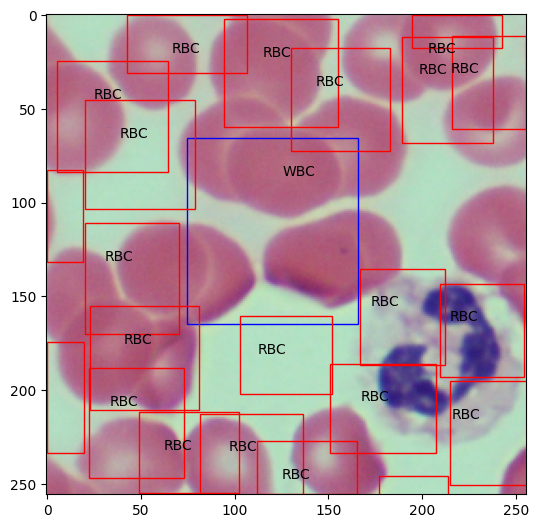

In [10]:
# showing a sample image with its ground truth
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
image = plt.imread('unzipped_dataset/images/image-24.png')
plt.imshow(image)

# iterating over the image for different objects
for _,row in df[df.image == "image-23.png"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.label == 0:
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.label == 1:
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [13]:
# data splitting
df_train = df[0:2099]
df_val = df[2099:]
print(df_train.shape, df_val.shape)

(2099, 14) (241, 14)


In [14]:
# creating a function for data segregation
def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
  filenames = []
  for filename in df.image:
    filenames.append(filename)
  filenames = set(filenames)
  
  for filename in filenames:
    yolo_list = []

    for _,row in df[df.image == filename].iterrows():
      yolo_list.append([row.label, row.x_center_norm, row.y_center_norm, row.width_norm, row.height_norm])

    yolo_list = np.array(yolo_list)
    txt_filename = os.path.join(train_label_path,str(row.image.split('.')[0])+".txt")
    # Save the .img & .txt files to the corresponding train and validation folders
    np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])
    shutil.copyfile(os.path.join(img_path,row.image), os.path.join(train_img_path,row.image))
     

In [15]:
import os
import numpy as np
import shutil

# Function to create directories if they don't exist
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Define your paths
src_img_path = "unzipped_dataset/images/"
src_label_path = "unzipped_dataset/annotations.csv"

train_img_path = "content/split/images/train"
train_label_path = "content/split/labels/train"

val_img_path = "content/split/images/val"
val_label_path = "content/split/labels/val"

# Ensure all directories exist
create_directory(train_img_path)
create_directory(train_label_path)
create_directory(val_img_path)
create_directory(val_label_path)

def segregate_data(df, img_path, label_path, output_img_path, output_label_path):
    for index, row in df.iterrows():
        # Construct the filename for the labels
        txt_filename = os.path.join(output_label_path, f"{os.path.splitext(row['image'])[0]}.txt")
        
        # Ensure the directory for the txt file exists
        os.makedirs(os.path.dirname(txt_filename), exist_ok=True)
        
        # Save the .txt file (dummy yolo_list for demonstration)
        yolo_list = [[0, 0.5, 0.5, 1.0, 1.0]]  # Replace this with your actual data
        np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])
        
        # Copy the image file
        shutil.copyfile(os.path.join(img_path, row['image']), os.path.join(output_img_path, row['image']))

# Call the segregate_data function
segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
segregate_data(df_val, src_img_path, src_label_path, val_img_path, val_label_path)


In [17]:
try:
  shutil.rmtree('content/split/images/train/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('content/split/images/val/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('content/split/labels/train/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('content/split/labels/val/.ipynb_checkpoints')
except FileNotFoundError:
  pass

print("Number of Training images", len(os.listdir('content/split/images/train')))
print("Number of Training labels", len(os.listdir('content/split/labels/train')))

print("Number of valid images", len(os.listdir('content/split/images/val')))
print("Number of valid labels", len(os.listdir('content/split/labels/val')))

Number of Training images 90
Number of Training labels 90
Number of valid images 10
Number of valid labels 10


In [19]:
def train():
    from tensorflow.keras import Sequential, layers
    from tensorflow.keras.callbacks import EarlyStopping
    from tensorflow.keras.layers.experimental.preprocessing import Rescaling


    hand_made_model = Sequential()
    hand_made_model.add(Rescaling(1./255, input_shape=(150,150,3)))

    hand_made_model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
    hand_made_model.add(layers.MaxPooling2D(3))

    hand_made_model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
    hand_made_model.add(layers.MaxPooling2D(2))

    hand_made_model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
    hand_made_model.add(layers.MaxPooling2D(2))

    hand_made_model.add(layers.Flatten())
    hand_made_model.add(layers.Dense(50, activation='relu'))
    hand_made_model.add(layers.Dense(20, activation='relu'))
    hand_made_model.add(layers.Dense(5, activation='softmax'))


    hand_made_model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )


    es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

    hand_made_model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

In [20]:
from sklearn.metrics import confusion_matrix

Accuracy: 0.9938
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.99      0.99       100

    accuracy                           0.99       162
   macro avg       0.99      0.99      0.99       162
weighted avg       0.99      0.99      0.99       162



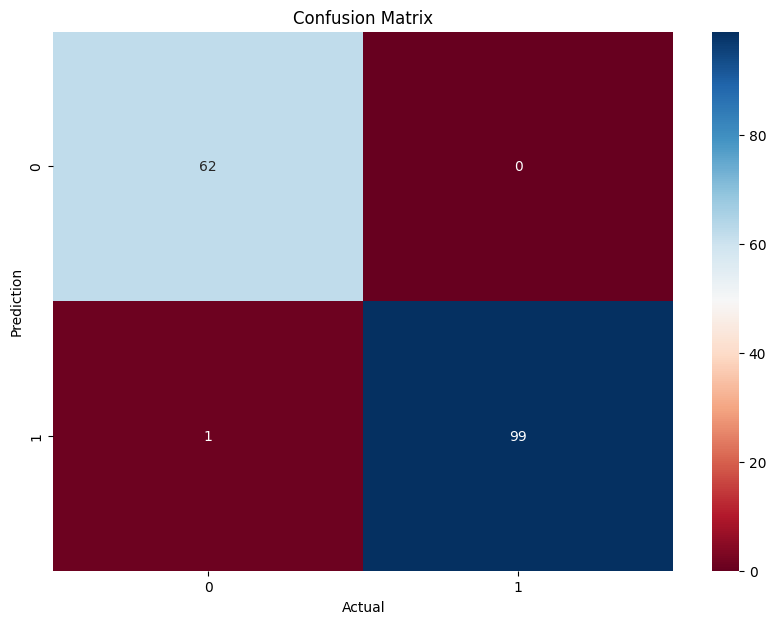

(array([[62,  0],
        [ 1, 99]], dtype=int64),
 0.9938271604938271,
 {'0': {'precision': 0.9841269841269841,
   'recall': 1.0,
   'f1-score': 0.992,
   'support': 62.0},
  '1': {'precision': 1.0,
   'recall': 0.99,
   'f1-score': 0.9949748743718593,
   'support': 100.0},
  'accuracy': 0.9938271604938271,
  'macro avg': {'precision': 0.9920634920634921,
   'recall': 0.995,
   'f1-score': 0.9934874371859297,
   'support': 162.0},
  'weighted avg': {'precision': 0.9939251420732902,
   'recall': 0.9938271604938271,
   'f1-score': 0.9938363422048513,
   'support': 162.0}})

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def confusionmetrics(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Generate classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    report_str = classification_report(y_true, y_pred)
    
    # Print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(report_str)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdBu', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.title('Confusion Matrix')
    plt.show()
    
    return cm, accuracy, report

# Example usage
y_true = [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1]

# Call the custom confusionmetrics function
confusionmetrics(y_true, y_pred)


In [23]:
import cv2

import matplotlib.pyplot as plt
filename = 'unzipped_dataset\\images\\image-24.png'
img=cv2.imread(filename, cv2.IMREAD_COLOR)

print(img)
 

cv2.imshow("image", img)

[[[174 193 194]
  [178 204 191]
  [185 210 188]
  ...
  [194 213 185]
  [190 210 186]
  [188 207 186]]

 [[175 191 196]
  [180 204 194]
  [183 207 188]
  ...
  [193 213 183]
  [193 211 186]
  [188 208 185]]

 [[172 185 195]
  [179 202 195]
  [184 208 190]
  ...
  [193 213 184]
  [192 214 186]
  [189 209 186]]

 ...

 [[121  97 175]
  [123  95 175]
  [126  94 178]
  ...
  [125  98 178]
  [124  96 179]
  [125  97 181]]

 [[124  97 177]
  [123  93 176]
  [123  90 175]
  ...
  [120  94 178]
  [123  94 179]
  [129  96 182]]

 [[122  94 177]
  [124  94 177]
  [121  89 173]
  ...
  [120  95 179]
  [125  94 180]
  [128  92 178]]]


In [25]:
confusion_matrix = np.array([
    [62, 0],
    [1, 99]
])

# Extract values from the confusion matrix
tn = confusion_matrix[0][0]
fp = confusion_matrix[0][1]
fn = confusion_matrix[1][0]
tp = confusion_matrix[1][1]

# Calulate the percentage of sickle cells (true positives and false negatives)
sickle_cells = tp + fp
total_cells = tn + fp + fn + tp
value = (sickle_cells / total_cells) * 100

In [26]:
print(str(value) +' of sickle cells')

61.111111111111114 of sickle cells
